![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=Science/LightTransmission/transmission-of-light.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [2]:
# Modules

import string
import numpy as np
import pandas as pd
import qgrid as q
import matplotlib.pyplot as plt

# Widgets & Display modules, etc..

from ipywidgets import widgets as w
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown

# grid features for interactive grids 

grid_features = { 'fullWidthRows': True,
                  'syncColumnCellResize': True,
                  'forceFitColumns': True,
                  'rowHeight': 40,
                  'enableColumnReorder': True,
                  'enableTextSelectionOnCells': True,
                  'editable': True,
                  'filterable': False,
                  'sortable': False,
                  'highlightSelectedRow': True}

In [3]:
from ipywidgets import Button , Layout , interact
from IPython.display import Javascript, display

# Function: executes previous cell on button widget click event and hides achievement indicators message

def run_current(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+0,IPython.notebook.get_selected_index()+1)'))    
    
# Counter for toggling achievement indicator on/off

button_ctr = 0

### Goal # 1
# Achievement Indicators

line_1 = "#### Achievement Indicators"
line_2 = "**General Outcome: **"
line_3 = "Learning about light and its interaction with different surface"
line_4 = "*Specific Outcome 1 *"
line_5 = "Investigate how light is reflected, transmitted and absorbed by different materials; and describe differences in the optical properties of various materials (e.g., compare light absorption of different materials; identify materials that transmit light; distinguish between clear and translucent materials; identify materials that will reflect a beam of light as a coherent beam"
line_6 = "*Specific Outcome 2*"
line_7 = "Investigate the transmission of light, and describe its behaviour using a geometric ray model."
line_8 = "*Specific Outcome 3*"
line_9 = "Investigate, measure and describe the refraction of light through different materials (e.g., measure differences in light refraction through pure water, salt water and different oils)"
line_10 = "*Specific Outcome 4*"
line_11 = "Investigate materials used in optical technologies; and predict the effects of changes in their design, alignment or composition"
# Use to print lines, then save in lines_list
def print_lines(n):
    
    lines_str = ""
    
    for i in range(1,n+1):
        lines_str = lines_str + "line_"+str(i)+","
        
    lines_str = lines_str[:-1]

    print(lines_str)
    
lines_list = [line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8,line_9,line_10,line_11]

ai_button_show = widgets.Button(button_style='info',description="Show Achievement Indicators", layout=Layout(width='25%', height='30px') )
ai_button_hide = widgets.Button(button_style='info',description="Hide Achievement Indicators", layout=Layout(width='25%', height='30px') )

display(Markdown("For instructors:"))

For instructors:

In [4]:
button_ctr += 1

if(button_ctr % 2 == 0):

    for line in lines_list:
        display(Markdown(line))
    
    display(ai_button_hide)
    ai_button_hide.on_click( run_current )
    
else:

    display(ai_button_show)
    ai_button_show.on_click( run_current )

Button(button_style='info', description='Show Achievement Indicators', layout=Layout(height='30px', width='25%…

In [5]:
from ipywidgets import widgets, Button
from IPython.display import display, Javascript, Markdown

# How to use this function:
# Modify start and end cells to control which cells to execute given an event (i.e. button clicked)

def run_cells( event ):
    
    # Start and end cells to execute from current cell this function is called
    
    start = 1
    end = 2
    
    # Javascript input
    
    ipy_js_string = 'IPython.notebook.execute_cell_range' + '(IPython.notebook.get_selected_index()+' + str(start) + ',IPython.notebook.get_selected_index()+' + str(end) + ')'

    display(Javascript(ipy_js_string)) 

# Transmission of Light

#### Grade 8  General Science 

<h2 align='center'>Introduction</h2>

In this notebook we will learn about light and visible light. We will learn about the physical properties of visible light and how it interacts with different surfaces. We will learn about opaque, transparent and translucent materials and the subtle differences between them. We will also cover the difference between coherent and incoherent light and objects that reflect a beam of light as coherent light. 

Through the use of a geometric ray model, we will interact with an implementation of the Law of Reflection as well as the Law of Refraction. We will learn the definitions of incidence ray, reflected ray, angle of incidence, angle of reflection, refracted ray, angle of refraction as well as index of refraction. 

We will explore what happens when we point a light ray through different materials, such as water, oil, salt, diamond and sugar solution, and observe the differences in angles of reflection and refraction that are produced. 

We will learn about an interesting phenomenon called "total internal reflection" as well as the notion of critical angle and the conditions that create such phenomenon between two materials. 


We begin with a few definitions and interactives to aid our understanding of what light and visible light are. 

<h3 align='center'>Light and Visible Light</h3>

**Light** is a form of energy that can be detected by the human eye. Light is composed of **photons**, and is propagated in the form of **waves** .  By wave, we mean something like this:

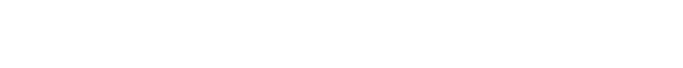

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(12,1))
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis("Off")
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)



In [7]:
# equivalent to rcParams['animation.html'] = 'html5'
%matplotlib inline
HTML(anim.to_html5_video())


**Wavelength** is the distance between successive crests of a wave. Light is measured by its wavelength (in nanometres, nm) or frequency (in Hertz). The photons at each wavelength have different energies: the shorter the wavelength (nm) the higher the energy. 

**Visible light** consists of wavelengths within a spectrum that the human eye can perceive. Certain wavelengths within the spectrum correspond to a specific colour based upon how humans typically perceive light of that wavelength.

Interact with the following widget to see the relationship between wavelength and visible light. 

In [8]:
import ipywidgets
from ipywidgets import widgets, interact
style = {'description_width': 'initial'}
%matplotlib inline
def wv_color(wv):
    fig = plt.figure(figsize=(20,8))

    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    ax.set_title("Visible Spectrum",fontsize=45)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
#ax.axis("Off")

    if 700<wv:
        ax.set_facecolor("black")
        ax.set_title("Infra Red",fontsize=45)
    elif 670<=wv and wv<=700 :
    
        ax.set_facecolor("#610000")
    elif  640<=wv and wv<670:
        ax.set_facecolor("#FF0000")
    
    elif 610<=wv and wv<640:
        ax.set_facecolor("#FF6900")
    
    elif 580<=wv and wv<610:
        ax.set_facecolor("#FFC000")
    
    elif 550<=wv and wv<580:
        ax.set_facecolor("#5BFF00")
    
    elif 520<=wv and wv<550:
        ax.set_facecolor("#00FFAB")
    
    elif 480<=wv and wv<520:
        ax.set_facecolor("#0082FF")
    
    elif 450<=wv and wv<480:
        ax.set_facecolor("#0008FF")
    
    elif 420<=wv and wv<450:
        ax.set_facecolor("#8F00FF")
    
    elif 400<=wv and wv<420:
        ax.set_facecolor("#610061")
    
    elif wv<400:
        ax.set_facecolor("black")
        ax.set_title("Ultra Violet",fontsize=45)

    plt.show()
    
interact(wv_color,wv=widgets.IntSlider(
            value=300,
            min=300,
            max=800,
            step=30,
            description='Wavelength (nm)',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
));

interactive(children=(IntSlider(value=300, continuous_update=False, description='Wavelength (nm)', max=800, mi…




<h3 align='center'>Properties of Visible Light </h3>

Below we illustrate intuitively the properties of visible light: 

**Rectilinear Propagation**: Light travels in a straight line. Light can also travel through vacuum, i.e. it does not require a medium to propagate. This property allows the light from the Sun to travel through space and reach the Earth. 

| |
|-------------------|--------------|
|<img src="./images/straight.png" width="550px"/> |



When light meets a surface, such as a mirror, it bounces off. This is known as **reflection**. Light can also pass through certain materials and change direction in doing so. This is known as **refraction**.

| Reflection|Refraction|
|-------------------|--------------|
|<img src="./images/basic_ref.png" width="250px"/>|<img src="./images/Basic_refrac.png" width="250px"/>|



**Travels through mediums to different degrees**: Depending on the material, light will pass through a material either partially, completely or not at all. Such materials are known, respectively, as 
translucent, transparent and opaque. We will learn more about these materials in the next section.


------

<h2 align='center'>Reflection, Transmission and Absorption of Light</h2>

When light strikes an object, a number of things could happen. For instance, light could be absorbed, in which case it is converted into heat. Light could also be reflected by the object. It could also be that is is transmitted through object itself. 

Different objects have distinct tendencies to absorb, reflect or transmit light of varying wavelengths. That is, one object might reflect the frequency that the human eye sees as green light while absorbing all other frequencies of visible light. A different object might transmit frequencies that the human eye sees as blue light, while absorbing all other frequencies of visible light.

From this we can see that the manner in which visible light interacts with an object depends on:

1.The wavelength of the light,

2.The nature of the atoms of the object.


<img src="./images/ColourOfLeaf.png" width="550px"/><figcaption>Visible spectrum. Retrieved from http://www.funscience.in/study-zone/Physics/RefractionOfLight/ColoursOfObjects.php on June 26, 2018.</figcaption>


<h2 align='center'>Differences in Optical Properties of Various Materials</h2>

We learned that, depending on the nature of atoms of the object and the wavelength of light, light can either be transmitted, reflected or absorbed. It is then natural to wonder what types of materials will yield each scenario. 

<h3>Light absorption of different materials</h3>

Light absorption is the process through which light is absorbed and converted into energy (mostly heat). Recall light absorption depends on the wavelength of light and the object's atoms and how they behave. If light's wavelength and the object's nature of atoms are complementary, light is absorbed. Otherwise it is either reflected or it goes through the object. 

Examples of materials that absorb light include living organisms such as plants, animals and people. 



<h3>Materials that transmit light</h3>

Materials that do not absorb light, such as transparent materials, have the property of allowing light to pass through. Some materials are partially transparent, absorbing part of the light and transmitting the rest. This property is what makes such materials to look tinted, since it only allows certain colours of light to pass through. 


<h3>Transparent vs translucent vs opaque materials</h3>

To summarize the information above, materials that absorb light, that is they **do not** allow light to pass through them are *opaque*.Materials that allow light to pass through them are either *transparent* or *translucent*. It is important to notice the distinction between the two. While transparent materials allow light to pass through them **completely**, translucent materials allow light to pass through them **partially**. A phenomenon known as "refraction" occurs when light passes through an object. We will learn more about this in the experiment section of this notebook. 

Press the button below to demonstrate the differences between transparent, translucent and opaque objects. 


In [9]:
import matplotlib.pyplot as plt
from matplotlib import patches
import ipywidgets 
from ipywidgets import interact_manual,interact,widgets

%matplotlib inline

style = {'description_width': 'initial'}


def switch(switch_value):
    
    fg_color = 'white'

    fig = plt.figure(facecolor=fg_color, edgecolor=fg_color)
    plt.subplots_adjust(left=5, bottom=None, right=11, top=3,
                wspace=0.1, hspace=0.1)
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1,3,3)


    switch=True

    if switch_value==True:
        bg_color = "#FFD340"
        ax1.patch.set_facecolor(bg_color)
        ax2.patch.set_facecolor(bg_color)
        ax3.patch.set_facecolor(bg_color)
        rect_1= patches.Rectangle((0.25,0.25),0.5,0.5,0,edgecolor="black",\
                         facecolor="#FFD340") 
        rect_2= patches.Rectangle((0.25,0.25),0.5,0.5,0,edgecolor="black",\
                         facecolor="#D7B74D") 
        rect_3= patches.Rectangle((0.25,0.25),0.5,0.5,0,edgecolor="white",\
                         facecolor="black") 
    else:
        bg_color = 'black'
        ax1.patch.set_facecolor(bg_color)
        ax2.patch.set_facecolor(bg_color)
        ax3.patch.set_facecolor(bg_color)
        rect_1= patches.Rectangle((0.25,0.25),0.5,0.5,0,edgecolor="white",\
                         facecolor="black") 
        rect_2= patches.Rectangle((0.25,0.25),0.5,0.5,0,edgecolor="white",\
                         facecolor="black") 
        rect_3= patches.Rectangle((0.25,0.25),0.5,0.5,0,edgecolor="white",\
                         facecolor="black") 

    ax1.add_patch(rect_1)
    ax2.add_patch(rect_2)
    ax3.add_patch(rect_3)

    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    ax3.set_xticklabels([])
    ax1.set_yticklabels([])
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])


    ax1.set_title("Transparent object",fontsize=45)
    ax2.set_title("Translucent object",fontsize=45)
    ax3.set_title("Opaque object",fontsize=45)

    ax1.set_autoscalex_on(b=1)
    ax2.set_autoscalex_on(b=2)
    ax3.set_autoscalex_on(b=2)
    
    ax1.grid("Off")
    ax2.grid("Off")
    ax3.grid("Off")
    plt.show()
interact(switch,switch_value = widgets.ToggleButton(
    value=False,
    description='Press Me',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
));

interactive(children=(ToggleButton(value=False, button_style='warning', description='Press Me', icon='check', …

<h3>Materials that reflect a beam of light as a coherent beam</h3>

Now that we have learned about the different ways light behaves when in contact with different objects, we will pause and make a distinction between two different types of light: *coherent* and *incoherent* light.


**Incoherent Light**
Light emitted by means such as a light bulb or a flashlight is called "incoherent". Incoherence is the property of light in which photons in the wave frequencies of light oscillate in different directions. 

**Coherent Light**
Coherent light, on the other hand, is characterized by the fact that its photons all have the same frequency. A good example of an object that emits coherent light is a laser. 


<img src="./images/Coherent.jpg" width="550px"/><figcaption>Coherent vs Incoherent Light. Retrieved from https://www.norwegiancreations.com/2018/04/laser-101-pt-1-the-basics/ on June 29, 2018.</figcaption>

---
Further reading

[Visible light](http://www.physicsclassroom.com/class/light/Lesson-2/Light-Absorption,-Reflection,-and-Transmission);
[Light absorption](https://www.wikilectures.eu/w/Light_absorption);
[Light transmission](https://sciencing.com/light-transmitted-5127127.html);
[Coherent and Incoherent Light](https://www.msnucleus.org/membership/html/k-6/as/technology/5/ast5_1a.html)

<h2 align='center'>The Law of Reflection</h2>

Now that we have a better understanding of what visible light is, and all the different scenarios that take place when light comes into contact with an object, we can learn in more detail what happens to light when it is reflected. 

We begin by defining the following concepts.

**Incident light ray**: This is the incoming light ray.

**Reflected light ray**: The ray that bounces off the surface.

**Normal to the surface**: an imaginary line that is perpendicular to the surface.  

**Angle of incidence**: the angle formed by the incident ray and the normal.

**Angle of reflection**: the angle formed by the reflected ray and the normal. 



We are now ready to explore what is known as the "Law of Reflection".

Let us take a flat smooth surface, such as a mirror, and let us point a ray of light at the mirror. 


The Law of reflection states that the angle formed between the incident ray and the normal is equal to the angle between the reflected ray and the normal.

<img src="./images/Reflection.png" width="450px"/>

This means that no matter what direction of the incident ray is, we can always determine the angle that the reflective ray will have with respect to the normal to the surface. 


<h3>Experiment: Law of Reflection</h3>

The interactive below is designed to model what would happen if we reflect a ray of light on a flat smooth surface that reflects light. 

In this diagram, the red arrow represents the incidence ray while the blue arrow represents the reflected ray. We denote the surface as Surface and the normal to the surface as N. 

Imagine we place a protractor to help us measure the angles of incidence and reflection. We place the normal at the $0 ^{\circ}$ mark. 

Using the widget below, choose an initial angle for the incidence ray. Use the degrees on the diagram to help you measure the incidence and reflected angles. 

What is the angle formed between the reflected ray and the normal?

In [10]:
from __future__ import division
from ipywidgets import widgets,interact_manual,interact
import matplotlib
import numpy as np
import math
from math import ceil
import matplotlib.pyplot as plt
%matplotlib inline

style = {'description_width': 'initial'}
@interact(
    theta1_refle = widgets.IntSlider(
            value=40,
            min=0,
            max=90,
            step=10,
            description='Angle of Incidence',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
)
)


def plot_reflection_diagram(theta1_refle):

    # radar green, solid grid lines
    plt.rc('grid', color='#316931', linewidth=1, linestyle='--')
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO
    width, height = matplotlib.rcParams['figure.figsize']
    size = min(width, height)
# make a square figure
    
    fig = plt.figure(figsize=(10, 18))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, facecolor='white')
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0,1,0.5))
    ax.set_theta_zero_location('N')

    
    ax.set_yticklabels([])
    ax.set_rmax(2.0)
    plt.grid(True)
    ax.set_thetamin(-90)
    ax.set_thetamax(90)
    ax.axhline()

#ax.set_title("And there was much rejoicing!", fontsize=20)
#This is the line I added:
    
    ax.arrow((theta1_refle)/180.*np.pi, 0, 0, 1, alpha = 1.5, width = 0.015,
                 edgecolor = 'red', facecolor = 'red', lw = 2, zorder = 5)


# arrow at 45 degree
    ax.arrow((-theta1_refle)/180.*np.pi, 0.0, 0, 1, alpha = 0.5, width = 0.015,
                 edgecolor = 'blue', facecolor = 'blue', lw = 2, zorder = 5)
    x_s = [-2,2]#10*cos(90/180*np.pi)
    y_s = [0,0]#10*sin(90/180*np.pi)
    ax.plot(x_s,y_s,color='black',linestyle='solid',transform=ax.transData._b)
   
    x_n = [0,0]#10*cos(90/180*np.pi)
    y_n = [0,2]#10*sin(90/180*np.pi)
    ax.plot(x_n,y_n,color='black',linestyle='solid',transform=ax.transData._b)
    matplotlib.pyplot.text(0, 2.2, "N", fontsize=20,transform=ax.transData._b)
    matplotlib.pyplot.text(2.2, 0, "Surface", fontsize=20,transform=ax.transData._b)
    #ax.legend()
#arr3 = plt.plot([0,-1],[0,-1])
    plt.show()

interactive(children=(IntSlider(value=40, continuous_update=False, description='Angle of Incidence', max=90, s…

<h3>Questions</h3>

1.What is the angle of reflection when we assume an initial angle of incidence of $20 ^{\circ}$? Assume you are measuring degrees as positive quantities, i.e. the sign does not matter in this case.

In [11]:
from ipywidgets import interact_manual,widgets


s = {'description_width': 'initial'}        
@interact_manual(answer =widgets.Select(
                    options=["Select option","90 \N{DEGREE SIGN}",\
                            "0 \N{DEGREE SIGN}","20 \N{DEGREE SIGN}",\
                             "-20 \N{DEGREE SIGN}"],
                    value='Select option',
                    description="Angle of reflection",
                    disabled=False,
                    style=s
))

def reflective_angle_question(answer):
    if answer=="Select option":
        print("Click on the correct reflective angle.\nPress the 'Run Interact' button when you consider you have found the answer.")
    
    elif answer=="20 \N{DEGREE SIGN}":
        print("Correct!\nBy the law of reflection, the reflective angle is equal to the incidence angle.")
    elif answer != "20 \N{DEGREE SIGN}" or answer != "Select Option":
        print("Recall that the law of reflection states that the reflective angle is equal to the incidence angle. We are assuming positive quantities and also we assume that the incidence angle is equal to 20 \N{DEGREE SIGN}.")

interactive(children=(Select(description='Angle of reflection', options=('Select option', '90 °', '0 °', '20 °…

In [12]:
def show_angle_true_answer(event):
    print("The correct answer is: 20\N{DEGREE SIGN}.\nIndeed, the Law of Reflection states that the angle between the incident ray and the normal is equal to the angle between the reflected ray and the normal. So, if the angle of incidence is equal to 20\N{DEGREE SIGN}, then the Law of Reflection implies the angle of reflection is equal to 20\N{DEGREE SIGN}.")

your_button = widgets.Button(button_style='info',description="Show True Answer")
display(your_button)

your_button.on_click(show_angle_true_answer)

Button(button_style='info', description='Show True Answer', style=ButtonStyle())


2.What happens when the angle of incidence (i.e. the angle between the incidence ray and the normal) is equal to $0^{\circ}$? Enter your answer and press "Run Interact" to save your response.

In [13]:
from ipywidgets import interact_manual,widgets

your_text_box = widgets.Textarea( value='', placeholder='', description='', disabled=False )
your_button = widgets.Button(button_style='info',description="Save Answer")

display(your_text_box)
display(your_button)

your_button.on_click( run_cells )




Textarea(value='', placeholder='')

Button(button_style='info', description='Save Answer', style=ButtonStyle())

In [14]:
user_input = your_text_box.value
if(user_input != ''):
    
    your_text_box.close()
    your_button.close()
    display(Markdown(user_input))





3.What happens when the angle of incidence (i.e. the angle between the incidence ray and the normal) is equal to $90^{\circ}$?

In [15]:
from ipywidgets import interact_manual,widgets

your_text_box = widgets.Textarea( value='', placeholder='', description='', disabled=False )
your_button = widgets.Button(button_style='info',description="Save Answer")

display(your_text_box)
display(your_button)

your_button.on_click( run_cells )



Textarea(value='', placeholder='')

Button(button_style='info', description='Save Answer', style=ButtonStyle())

In [16]:
user_input = your_text_box.value
if(user_input != ''):
    
    your_text_box.close()
    your_button.close()
    display(Markdown(user_input))



<h2 align='center'>Refraction of Light</h2>


We learned that the Law of Reflection states that for a given flat smooth surface that reflects light and an incident ray, the angle of incidence is equal to the angle of reflection. This is, of course, assuming that all light is reflected.


A natural question to ask is: what happens when a portion of the light ray is reflected while another passes through the surface? We will explore the answer to this question in this section. 

We begin by defining the following concepts.

**Refraction**: this is, intuitively, the bending of light as it passes from one medium to another. If an incident ray hits an opaque illuminated object, then no light passes through the object, however if the ray hits a transparent medium (such as glass), then a portion of the light is reflected while another portion passes through the material. 

**Refracted ray**: as the light ray passes through the material, it changes direction. This new ray is what we call the refracted ray. 

**Angle of refraction**: this is the angle formed between the normal and the refracted ray. 

**Refractive index** of a material is the value calculated from the ratio of the speed of light in a vacuum to that in a second medium of greater density. 

<h4>What happens when light is refracted?</h4>

As a light ray travels from a less dense material to a more dense material it slows down, making the refraction ray bend towards the normal. If on the other hand, a light ray travels from a more dense material to a less dense material, it speeds up, making the ray bend away from the normal. 



<img src="./images/Refraction.png" width="450px"/>

In this diagram, $n_1,n_2$ denote, respectively, the refractive index of the first and second medium while $\theta _1, \theta _2$ denote, respectively, the angle of incidence  and the angle of refraction. 


Just like with reflection, there exists a Law of Refraction, also known as [Snells Law](https://www.britannica.com/science/Snells-law). Although we will not explore in detail the mathematics behind Snell's law, we will demonstrate it via the following interactive.

<h3>Experiment: Law of Refraction</h3>

In this table you can find the index of refraction for different materials. 

| Material | Index of Refraction |
|----------|---------------------|
|Vacuum    | 1.000 |
|Water at $20 ^{\circ}C$| 1.330 |
|Sugar solution(30%)	|1.380|
|Sugar solution (80%)	|1.490|
|Oil, vegetable $50 ^{\circ}C$	|1.470
|Salt | 1.520 |
|Diamond | 2.417 |

Indices of refraction obtained from [HyperPhysics](http://hyperphysics.phy-astr.gsu.edu/hbase/index.html) and [The Engineering ToolBox](https://www.engineeringtoolbox.com/refractive-index-d_1264.html)

The widget below models what would happen if you point a light ray through one of materials on the table. As before, we denote a red arrow as the incidence ray and a blue arrow as the reflected ray. We will use a green arrow to denote the refracted ray. 

Use the widget below to model what would happen if you pointed a ray of light through two different materials. We assume the "top material" is vacuum. You can select the bottom material from the drop down menu. We assume there is a surface between the top material and the bottom material that reflects a portion of the light and refracts another portion. As before, we denote the normal to the surface as N. 

Once you have chosen a bottom material, select an angle of incidence. Press "Run Interact" afterwards. 

Observe the differences between the angle of refraction and the angle of incidence on the different materials provided. 

In [17]:
from __future__ import division
from ipywidgets import widgets,interact_manual
import matplotlib
import numpy as np
import math
from matplotlib import patches
import matplotlib.pyplot as plt
from math import ceil, cos, sin
%matplotlib inline


style = {'description_width': 'initial'}
@interact(
    
    n2 = widgets.Dropdown(
        options={'Vacuum':1.000,\
                 'Water at 20C':1.330,\
                 'Sugar Solution (30%)':1.380,\
                 'Sugar Solution (80%)':1.490,\
                 'Oil, vegetable': 1.470,\
                 'Salt': 1.520,\
                 'Diamond': 2.417},
        value = 1.000,
        description = "Bottom material",
        style =style
                ),
    theta1 = widgets.IntSlider(
            value=45,
            min=0,
            max=90,
            step=5,
            description='Angle of Incidence',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
)
)



def plot_refraction_diagram(n2,theta1):

    index_dictionary = {1.000:"#FFFFFF",1.330:"#64D5FF",1.380:"#8BA5AE",\
                       1.490:"#80A4B0",1.470:"#F4D41E",1.520:"#F9F3D6",\
                       2.417:"#DAFCF7"}


    n1 = 1.000
# force square figure and square axes looks better for polar, IMO
    width, height = matplotlib.rcParams['figure.figsize']
    size = min(width, height)

    fig = plt.figure(figsize=(10, 18))
    ax = fig.add_subplot(111,projection="polar", facecolor='white')
    ax.set_theta_zero_location('N')
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0,1,0.5))


    ax.set_yticklabels([])
    ax.set_rmax(2.0)
    plt.grid(True)

    ax.axhline()
    pat_col_2 = index_dictionary[n2]
    pat_col_1 = index_dictionary[n1]
    
    ax.add_patch(
        patches.Rectangle(
            (0, 0), width=-1.5*math.pi, height=3, facecolor=pat_col_2
        )
    )
    ax.add_patch(
        patches.Rectangle(
            (0, 0), width=0.5*math.pi, height=3, facecolor=pat_col_1
        )
    )
    ax.add_patch(
        patches.Rectangle(
            (0, 0), width=-0.5*math.pi, height=3, facecolor=pat_col_1
        )
    )
    
    ax.bar(0, 1).remove()

    ax.arrow((theta1)/180.*np.pi, 0, 0, 1, alpha = 1.5, width = 0.015,label="Incidence Ray",
                 edgecolor = 'red', facecolor = 'red', lw = 2, zorder = 5)

    x_s = [-2,2]#10*cos(90/180*np.pi)
    y_s = [0,0]#10*sin(90/180*np.pi)
    ax.plot(x_s,y_s,color='black',linestyle='solid',transform=ax.transData._b)
    
    x_n = [0,0]#10*cos(90/180*np.pi)
    y_n = [-2,2]#10*sin(90/180*np.pi)
    ax.plot(x_n,y_n,color='black',linestyle='solid',transform=ax.transData._b)
    #ax.axhline(y=0,xmin=0,xmax=10)
# arrow at 45 degree
    ax.arrow((-theta1)/180.*np.pi, 0.0, 0, 1, alpha = 0.5, width = 0.015,label="Reflection Ray",
                 edgecolor = 'blue', facecolor = 'blue', lw = 2, zorder = 5)
    matplotlib.pyplot.text(0, 2.2, "N", fontsize=20,transform=ax.transData._b)
    matplotlib.pyplot.text(2.2, 0, "Surface", fontsize=20,transform=ax.transData._b)
    if ((n1*math.sin(theta1*math.pi/180)/n2)<-1) or ((n1*math.sin(theta1*math.pi/180))/n2>1):
        print("Angle of incidence: %i" %ceil(theta1) + "\N{DEGREE SIGN}")
        print("Angle of reflection: %i" %ceil(theta1)+ "\N{DEGREE SIGN}")
        print("\033[1mTotal Internal Reflection. You are at or past the critical angle.\033[0m\nRead more below to learn what this means.")
        exit
    else:
        theta2=(math.asin(n1*math.sin(theta1*math.pi/180)/n2))*180/math.pi
        print("Angle of incidence: %i" %ceil(theta1) + "\N{DEGREE SIGN}")
        print("Angle of reflection: %i" %ceil(theta1)+ "\N{DEGREE SIGN}")
        print("Angle of refraction: %i" %ceil(theta2) + "\N{DEGREE SIGN}")
        ax.arrow((theta2 + 180)/180.*np.pi, 0.0, 0, 1, alpha = 0.5, width = 0.015,label="Refraction Ray",
                  edgecolor = 'green', facecolor = 'green', lw = 2, zorder = 5)
    
    ax.legend()

    plt.show()

interactive(children=(Dropdown(description='Bottom material', options={'Vacuum': 1.0, 'Water at 20C': 1.33, 'S…


<h3>Questions </h3>

1. What is the angle of refraction that is obtained when we pass a ray of light through oil, if we assume an angle of incidence of $15 ^{\circ}$? The answer will be printed on our model. Copy and paste the answer on the box below and press "Run Interact" when you are done.

In [18]:
from ipywidgets import interact_manual,widgets


        
s = {'description_width': 'initial'}        
@interact_manual(answer =widgets.Textarea(
    value=' ',
    placeholder='Type something',
    description='Your Answer:',
    disabled=False,
    style=s))
def get_answer_one(answer):
    if "11" in answer:
        print("Correct!")
    else:
        print("That angle seems off. The correct model's parameters are as follows:\Bottom material: Oil, vegetable\nAngle of incidence:15\N{DEGREE SIGN}")


interactive(children=(Textarea(value=' ', description='Your Answer:', placeholder='Type something', style=Desc…

In [19]:
def show_answer_one_true_answer(event):
    print("The correct answer is: 11\N{DEGREE SIGN}.\nIn this widget, we assume first material: Vacuum, second material: oil, and incidence angle: 15\N{DEGREE SIGN}.\nAfter pressing Run Interact, we find\nAngle of incidence: 15\N{DEGREE SIGN}\nAngle of reflection: 15\N{DEGREE SIGN}\nAngle of refraction: 11\N{DEGREE SIGN}")

your_button = widgets.Button(button_style='info',description="Show True Answer")
display(your_button)

your_button.on_click(show_answer_one_true_answer)

Button(button_style='info', description='Show True Answer', style=ButtonStyle())

2.What what is the angle of refraction obtained if we keep oil as the bottom material, but change the angle of incidence to $90 ^{\circ}$?. Copy and paste the answer on the box below and press "Run Interact" when you are done.

In [20]:
from ipywidgets import interact_manual,widgets


        
s = {'description_width': 'initial'}        
@interact_manual(answer =widgets.Textarea(
    value=' ',
    placeholder='Type something',
    description='Your Answer:',
    disabled=False,
    style=s))
def get_answer_one(answer):
    if "43" in answer:
        print("Correct!")
    else:
        print("That angle seems off. The new model's parameters are as follows:\Bottom material: Oil, vegetable\nAngle of incidence:15\N{DEGREE SIGN}")


interactive(children=(Textarea(value=' ', description='Your Answer:', placeholder='Type something', style=Desc…

In [21]:
def show_answer_two_true_answer(event):
    print("The correct answer is: 43\N{DEGREE SIGN}.\nIn this widget, we assume first material is vacuum, the bottom material is oil, vegetable, and incidence angle: 90\N{DEGREE SIGN}.\nAfter pressing Run Interact, we find\nAngle of incidence: 90\N{DEGREE SIGN}\nAngle of reflection: 90\N{DEGREE SIGN} \nAngle of refraction: 43\N{DEGREE SIGN}")

your_button = widgets.Button(button_style='info',description="Show True Answer")
display(your_button)

your_button.on_click(show_answer_two_true_answer)

Button(button_style='info', description='Show True Answer', style=ButtonStyle())

<h2 align='center'>Total Internal Reflection</h2>

There is an interesting phenomenon that occurs if the angle of incidence is greater than a certain "critical angle". 

The critical angle is the angle of incidence for which the angle of refraction is $90 ^{\circ}$ with respect to the normal to the surface. 

In general, this phenomenon takes place at the boundary between two transparent media when a ray of light in a medium of higher index of refraction approaches the other medium at an angle of incidence greater than the critical angle. 

We can observe this phenomenon in our model. Consider, for instance, diamonds. They posses an index of refraction of 2.417. Using the widget below we find that if the second material is a vacuum, then the critical angle is $25 ^{\circ}$. 

<h3>Question</h3>

Assume the material on top of a surface is a diamond. Choose a bottom material from the drop down menu. Use the ball widget to find what the critical angle is for each of the materials in the displayable menu.

An example has been found when the bottom material is vacuum. We find that the critical angle occurs when the angle of incidence is equal to $25 ^{\circ}$.

In [22]:
from __future__ import division
from ipywidgets import widgets,interact_manual
import matplotlib
import numpy as np
import math
from matplotlib import patches
import matplotlib.pyplot as plt
from math import ceil, cos, sin
%matplotlib inline


style = {'description_width': 'initial'}
@interact(
    n2 = widgets.Dropdown(
        options={'Vacuum':1.000,\
                 'Water at 20C':1.330,\
                 'Sugar Solution (30%)':1.380,\
                 'Sugar Solution (80%)':1.490,\
                 'Oil, vegetable': 1.470,\
                 'Salt': 1.520,\
                 'Diamond': 2.417},
        value = 1.000,
        description = "Bottom material",
        style =style
                ),
    theta1 = widgets.IntSlider(
            value=25,
            min=0,
            max=90,
            step=1,
            description='Angle of Incidence',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
)
)



def plot_refraction_diagram_issue(n2,theta1):

    index_dictionary = {1.000:"#FFFFFF",1.330:"#64D5FF",1.380:"#8BA5AE",\
                       1.490:"#80A4B0",1.470:"#F4D41E",1.520:"#F9F3D6",\
                       2.417:"#DAFCF7"}
    n1= 2.417


# force square figure and square axes looks better for polar, IMO
    width, height = matplotlib.rcParams['figure.figsize']
    size = min(width, height)

    fig = plt.figure(figsize=(10, 18))
    ax = fig.add_subplot(111,projection="polar", facecolor='white')
    ax.set_theta_zero_location('N')
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0,1,0.5))


    ax.set_yticklabels([])
    ax.set_rmax(2.0)
    plt.grid(True)

    ax.axhline()
    pat_col_2 = index_dictionary[n2]
    pat_col_1 = index_dictionary[n1]
    
    ax.add_patch(
        patches.Rectangle(
            (0, 0), width=-1.5*math.pi, height=3, facecolor=pat_col_2
        )
    )
    ax.add_patch(
        patches.Rectangle(
            (0, 0), width=0.5*math.pi, height=3, facecolor=pat_col_1
        )
    )
    ax.add_patch(
        patches.Rectangle(
            (0, 0), width=-0.5*math.pi, height=3, facecolor=pat_col_1
        )
    )
    
    ax.bar(0, 1).remove()

    ax.arrow((theta1)/180.*np.pi, 0, 0, 1, alpha = 1.5, width = 0.015,label="Incidence Ray",
                 edgecolor = 'red', facecolor = 'red', lw = 2, zorder = 5)

    x_s = [-2,2]#10*cos(90/180*np.pi)
    y_s = [0,0]#10*sin(90/180*np.pi)
    ax.plot(x_s,y_s,color='black',linestyle='solid',transform=ax.transData._b)
    
    x_n = [0,0]#10*cos(90/180*np.pi)
    y_n = [-2,2]#10*sin(90/180*np.pi)
    ax.plot(x_n,y_n,color='black',linestyle='solid',transform=ax.transData._b)
    #ax.axhline(y=0,xmin=0,xmax=10)
# arrow at 45 degree
    ax.arrow((-theta1)/180.*np.pi, 0.0, 0, 1, alpha = 0.5, width = 0.015,label="Reflection Ray",
                 edgecolor = 'blue', facecolor = 'blue', lw = 2, zorder = 5)
    matplotlib.pyplot.text(0, 2.2, "N", fontsize=20,transform=ax.transData._b)
    matplotlib.pyplot.text(2.2, 0, "Surface", fontsize=20,transform=ax.transData._b)
    if ((n1*math.sin(theta1*math.pi/180)/n2)<-1) or ((n1*math.sin(theta1*math.pi/180))/n2>1):
        print("Angle of incidence: %i" %ceil(theta1) + "\N{DEGREE SIGN}")
        print("Angle of reflection: %i" %ceil(theta1)+ "\N{DEGREE SIGN}")
        print("\033[1mTotal Internal Reflection. You are at or past the critical angle.\033[0m")
        exit
    else:
        theta2=(math.asin(n1*math.sin(theta1*math.pi/180)/n2))*180/math.pi
        print("Angle of incidence: %i" %ceil(theta1) + "\N{DEGREE SIGN}")
        print("Angle of reflection: %i" %ceil(theta1)+ "\N{DEGREE SIGN}")
        print("Angle of refraction: %i" %ceil(theta2) + "\N{DEGREE SIGN}")
        ax.arrow((theta2 + 180)/180.*np.pi, 0.0, 0, 1, alpha = 0.5, width = 0.015,label="Refraction Ray",
                  edgecolor = 'green', facecolor = 'green', lw = 2, zorder = 5)
    
    ax.legend()

    plt.show()

interactive(children=(Dropdown(description='Bottom material', options={'Vacuum': 1.0, 'Water at 20C': 1.33, 'S…

3.Assuming diamond is still the top material we picked and using the widget above, pick salt as the bottom material. What is the critical angle for these two materials? 

In [23]:
from ipywidgets import interact_manual,widgets


        
s = {'description_width': 'initial'}        
@interact_manual(answer =widgets.Textarea(
    value=' ',
    placeholder='Type something',
    description='Your Answer:',
    disabled=False,
    style=s))
def get_answer_one(answer):
    if "39" in answer:
        print("Correct! Any angle below 39\N{DEGREE SIGN} will yield a refraction ray, while any angle greater than or equal to 39\N{DEGREE SIGN} will yield total internal reflection.")
    else:
        print("That angle seems off.\nIf Salt is the second material, the correct answer lies between 30 \N{DEGREE SIGN} and 40\N{DEGREE SIGN}.")


interactive(children=(Textarea(value=' ', description='Your Answer:', placeholder='Type something', style=Desc…

In [24]:
def show_answer_thr_true_answer(event):
    print("The correct answer is: 39\N{DEGREE SIGN}.\nIn this widget, we assume first material: diamond, second material: salt.\nOur goal is to find the smallest angle for which we see a legend on the screen 'Total Internal Reflection. You are at or past the critical angle.'\nSuch legend appears first when the angle of incidence is equal to 39\N{DEGREE SIGN}")

your_button = widgets.Button(button_style='info',description="Show True Answer")
display(your_button)

your_button.on_click(show_answer_thr_true_answer)

Button(button_style='info', description='Show True Answer', style=ButtonStyle())

<h2 align='center'>Optical Technologies</h2>

1. Microscopes
2. Telescopes: reflecting and refracting telescopes.
3. Cameras
4. Binoculars
5. Face shields
6. Magnifying glasses
7. Contact lenses
8. Flashlights
9. Eye glasses
10. Laser
11. Movie projectors
12. Overhead projectors

Need more notes on what "predict the effects of changes in their design, alignment or composition" means. 



<h2 align='center'>Conclusion</h2>

In this notebook we learned about different types of materials. We learned that materials can be classified as either luminous or illuminated, depending on their capacity to transmit or reflect light. Depending on the capacity to allow light to pass through them, they can be either opaque, transparent and translucent. We found that there are opaque objects that are luminous (such as the sun) and opaque objects that are illuminated (such as the moon).

We also learned the Law of Reflection: given an opaque surface and an incidence ray, the incident angle (with respect to the normal) is equal to the reflective angle (with respect to the normal). 

We learned that when we point a ray of light through a transparent surface, a portion of the light is reflected while another portion is refracted. We learned about Snell's law and conducted a simple experiment with different materials. We found what the critical angle was two materials, assuming the first material is a diamond.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)